## Angadi Abhinay - 7997608258 - angadiabhinay2001@gmail.com

### Complete the tasks mentioned in each section below with relevant code and execute them to reflect the desired output

1. Load the Data in the file - "assignment_python.csv" given to you as a .csv using Pandas 
2. Understand the data using the columns given (metadata descriptions below)
3. Calculate the time period in days for which the customer was active (days from first deposit date) and enter the value in a new column titled 'Customer Lifetime' & what is the lifetime in days for customer ID - 5371454
4. Find the city & country with the highest number of unique customers
5. Find the unique count of players in each country (in descending order) & specify the number of unique players from the city - Kayseri
6. Which city gives the third highest average first_deposit_amount and what is the average amount? 
7. Plot a graph showing the city and the descending unique count of the unique customers (upto the top 40 cities by the unique count) and make a large plot (clearly visible) and make sure the title and labels are clearly visible.
8. Plot the conversion for each month of the data (Conversion % = No. of unique First Deposits in the month / No. of unique Registrations in the month) Here, the conversion percentage should be reflected in red, and the labels in the X-axis should be year & month out of the Deposit Dates.
9. What was the conversion rate in June 2022, limit the answer to 2 decimal places. (in %)
10. Make a copy of the original data in the file assignment_python as a pandas dataframe called 'df_ft' and generate the following columns:
    1. week of day column from the deposit date column
    2. descriptive statistics of the table
    3. make a column with the first_deposit_amounts binned in bins of 500 and reflected against every customer ID (for example, someone with a first deposit amount of 880 should reflect in the binning column as '500-1000'.
11. Find a 7 days moving average of number of registrations. (calculating an average of the T-7 days for every week's total registrations)

Descriptions:
- IDCUSTOMER = Unique Identifier for a customer
- GENDER, CITY, COUNTRY = Self Explanatory
- FIRST DEPOSIT AMOUNT = Customer's first deposit amount
- REGISTRATION DATE = The date of registration of the customer

- DEPOSIT DATE = The date of the first deposit made by the registered customer

### Task-1: Loading the dataset

In [2]:
# importing pandas to read the dataset
import pandas as pd
df = pd.read_csv('assignment_python.csv')
df

,IDCUSTOMER,GENDER,CITY,COUNTRY,FIRST_DEPOSIT_AMOUNT,REGISTRATION_DATE,DEPOSIT_DATE
0,5075649,M,ankara,Turkey,100.0,2009-01-10,2022-06-05
1,5176235,M,elazığ,Turkey,400.0,2009-03-01,2022-02-11
2,5249140,M,izmir,Turkey,200.0,2009-04-06,2022-05-02
3,5300998,M,Üsküdar,Turkey,100.0,2009-05-02,2022-02-11
4,5371454,M,sakarya,Turkey,880.0,2009-06-07,2022-05-29
...,...,...,...,...,...,...,...
22060,147844121,M,İstanbul,Turkey,50.0,2022-08-31,2022-08-31
22061,147844491,M,Eskişehir,Turkey,50.0,2022-08-31,2022-08-31
22062,147846481,M,Van,Turkey,100.0,2022-08-31,2022-08-31
22063,147843561,M,Antalya,Turkey,200.0,2022-08-31,2022-08-31


### Task-2: Understanding the dataset

In [3]:
#no of rows, columns of the dataset
df.shape

(22065, 7)

In [4]:
# column names
col_names = df.columns.tolist()
col_names

['IDCUSTOMER',
 'GENDER',
 'CITY',
 'COUNTRY',
 'FIRST_DEPOSIT_AMOUNT',
 'REGISTRATION_DATE',
 'DEPOSIT_DATE']

In [5]:
# data types of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22065 entries, 0 to 22064
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   IDCUSTOMER            22065 non-null  int64  
 1   GENDER                22065 non-null  object 
 2   CITY                  22065 non-null  object 
 3   COUNTRY               22065 non-null  object 
 4   FIRST_DEPOSIT_AMOUNT  22065 non-null  float64
 5   REGISTRATION_DATE     22065 non-null  object 
 6   DEPOSIT_DATE          22065 non-null  object 
dtypes: float64(1), int64(1), object(5)
memory usage: 1.2+ MB


In [6]:
# statistical values of the dataset
descriptive_stats = df.describe(include='all')
descriptive_stats

,IDCUSTOMER,GENDER,CITY,COUNTRY,FIRST_DEPOSIT_AMOUNT,REGISTRATION_DATE,DEPOSIT_DATE
count,2.206500e+04,22065,22065,22065,22065.000000,22065,22065
unique,NaN,3,331,1,NaN,1417,243
top,NaN,M,İstanbul,Turkey,NaN,2022-03-22,2022-04-26
freq,NaN,21985,4770,22065,NaN,148,169
mean,1.380593e+08,NaN,NaN,NaN,284.806530,NaN,NaN
std,3.272693e+07,NaN,NaN,NaN,943.993064,NaN,NaN
min,5.075649e+06,NaN,NaN,NaN,0.380000,NaN,NaN
25%,1.459097e+08,NaN,NaN,NaN,70.000000,NaN,NaN
50%,1.465139e+08,NaN,NaN,NaN,100.000000,NaN,NaN
75%,1.471483e+08,NaN,NaN,NaN,250.000000,NaN,NaN


In [7]:
# mean, median, mode foe the numeric value columns
mean_values = df.mean(numeric_only=True)
mean_values

IDCUSTOMER              1.380593e+08
FIRST_DEPOSIT_AMOUNT    2.848065e+02
dtype: float64

In [8]:
median_values = df.median(numeric_only=True)
median_values

IDCUSTOMER              146513941.0
FIRST_DEPOSIT_AMOUNT          100.0
dtype: float64

In [9]:
mode_values = df.mode().iloc[0]
mode_values

IDCUSTOMER                 5075649
GENDER                           M
CITY                      İstanbul
COUNTRY                     Turkey
FIRST_DEPOSIT_AMOUNT         100.0
REGISTRATION_DATE       2022-03-22
DEPOSIT_DATE            2022-04-26
Name: 0, dtype: object

In [10]:
# checking for null values
null_values = df.isnull().sum()
null_values

IDCUSTOMER              0
GENDER                  0
CITY                    0
COUNTRY                 0
FIRST_DEPOSIT_AMOUNT    0
REGISTRATION_DATE       0
DEPOSIT_DATE            0
dtype: int64

In [11]:
# checking for duplicated values
duplicat_values = df.duplicated().sum()
duplicat_values

0

### Task-3: Calculate the time period in days for which the customer was active (days from first deposit date) and enter the value in a new column titled 'Customer Lifetime' & what is the lifetime in days for customer ID - 5371454

In [12]:
#converting deposit time to datetime format
from datetime import datetime
df['DEPOSIT_DATE'] = pd.to_datetime(df['DEPOSIT_DATE'])
df.head()

,IDCUSTOMER,GENDER,CITY,COUNTRY,FIRST_DEPOSIT_AMOUNT,REGISTRATION_DATE,DEPOSIT_DATE
0,5075649,M,ankara,Turkey,100.0,2009-01-10,2022-06-05
1,5176235,M,elazığ,Turkey,400.0,2009-03-01,2022-02-11
2,5249140,M,izmir,Turkey,200.0,2009-04-06,2022-05-02
3,5300998,M,Üsküdar,Turkey,100.0,2009-05-02,2022-02-11
4,5371454,M,sakarya,Turkey,880.0,2009-06-07,2022-05-29


In [13]:
#calculating current date and time
current_date = datetime.now()

In [14]:
#calculatinf difference between deposit_date and current_date and adding it to a column named customer_lifetime
df['Customer_Lifetime'] = (current_date - df['DEPOSIT_DATE']).dt.days
df.head()

,IDCUSTOMER,GENDER,CITY,COUNTRY,FIRST_DEPOSIT_AMOUNT,REGISTRATION_DATE,DEPOSIT_DATE,Customer_Lifetime
0,5075649,M,ankara,Turkey,100.0,2009-01-10,2022-06-05,791
1,5176235,M,elazığ,Turkey,400.0,2009-03-01,2022-02-11,905
2,5249140,M,izmir,Turkey,200.0,2009-04-06,2022-05-02,825
3,5300998,M,Üsküdar,Turkey,100.0,2009-05-02,2022-02-11,905
4,5371454,M,sakarya,Turkey,880.0,2009-06-07,2022-05-29,798


In [15]:
#calculatinf lifetime of a customer with id 5371454
id_ = 5371454
customer_lifetime = df.loc[df['IDCUSTOMER'] == id_, 'Customer_Lifetime'].values[0]
customer_lifetime

798

### Task-4 : Find the city & country with the highest number of unique customers

In [25]:
#grouping by city and country, then calculating unique customers
unique_city_customers = df.groupby('CITY')['IDCUSTOMER'].nunique()
unique_city_customers

CITY
                                      1
1212                                  1
ANKARA                                1
ANTALYA                               1
Adana                               676
                                   ... 
İç kapı no 7 sancaktepe/İstanbul      1
Şanlıurfa                           255
Şırnak                               84
şanlıurfa                             1
şırnak cizre                          1
Name: IDCUSTOMER, Length: 331, dtype: int64

In [26]:
unique_country_customers = df.groupby('COUNTRY')['IDCUSTOMER'].nunique()
unique_country_customers

COUNTRY
Turkey    22065
Name: IDCUSTOMER, dtype: int64

In [31]:
# finding city and country with highest unique number of customers
top_city_name = unique_city_customers.idxmax()
print(top_city_name)

top_city_count = unique_city_customers.max()
print(top_city_count)

İstanbul
4770


In [32]:
top_country_name = unique_country_customers.idxmax()
print(top_country_name)

top_city_count = unique_country_customers.max()
print(top_city_count)

Turkey
22065


### Task-5 : Find the unique count of players in each country (in descending order) & specify the number of unique players from the city - Kayseri

In [43]:
# unique payers from the county in descending order
unique_payers_country = df.groupby('COUNTRY')['IDCUSTOMER'].nunique().sort_values(ascending=False)
print(unique_payers_country)

COUNTRY
Turkey    22065
Name: IDCUSTOMER, dtype: int64


In [44]:
# unique payers from the city kayseri
unique_payers_kayseri = df[df['CITY'].str.lower() == 'kayseri']['IDCUSTOMER'].nunique()
print(unique_payers_kayseri)

370


### Task-6 : Which city gives the third highest average first_deposit_amount and what is the average amount?

In [52]:
# calculating average first deposit amount of each city
city_highest_average = df.groupby('CITY')['FIRST_DEPOSIT_AMOUNT'].mean()
city_highest_average

CITY
                                     50.000000
1212                                100.000000
ANKARA                              100.000000
ANTALYA                             500.000000
Adana                               720.728506
                                       ...    
İç kapı no 7 sancaktepe/İstanbul     70.000000
Şanlıurfa                           313.403922
Şırnak                              245.566071
şanlıurfa                           400.000000
şırnak cizre                        100.000000
Name: FIRST_DEPOSIT_AMOUNT, Length: 331, dtype: float64

In [53]:
# sorting the cities average in descending order
sorted_city_average = city_highest_average.sort_values(ascending=False)
sorted_city_average

CITY
Atasehir -İstanbul                     100000.0
Seyhan/Adana                            10000.0
sarıçam/Adana                            9000.0
İZMİR/karşıyaka                          5000.0
Ankara/Çankaya                           5000.0
                                         ...   
siirt                                      27.0
ordu/fatsa                                 25.0
merkez/edirne                              25.0
bursa iznik yesılcami mh karaca skk        25.0
kocaeli                                    20.0
Name: FIRST_DEPOSIT_AMOUNT, Length: 331, dtype: float64

In [56]:
# finding city with the third highest average deposit
third_highest_city = sorted_city_average.index[2]
print(third_highest_city)

third_highest_amount = sorted_city_average.iloc[2]
print(third_highest_amount)

sarıçam/Adana
9000.0


### Task-7 : Plot a graph showing the city and the descending unique count of the unique customers (upto the top 40 cities by the unique count) and make a large plot (clearly visible) and make sure the title and labels are clearly visible.

In [58]:
# Calculating the unique count of customers per city
unique_customers_per_city = df.groupby('CITY')['IDCUSTOMER'].nunique().sort_values(ascending=False)


In [59]:
# Select the top 40 cities
top_40_cities = unique_customers_per_city.head(40)
top_40_cities

CITY
İstanbul         4770
Bursa            1652
Diyarbakır       1307
Ankara           1182
İzmir            1151
Antalya           789
Adana             676
Kocaeli           635
Gaziantep         576
Tekirdağ          370
Kayseri           369
Aydın             353
Denizli           351
Balıkesir         340
Konya             334
Hatay             318
Sakarya           310
Mersin            306
Manisa            271
Şanlıurfa         255
Muğla             249
Eskişehir         218
Samsun            215
Kahramanmaraş     201
Van               166
Trabzon           160
Mardin            160
Çanakkale         147
Batman            142
Edirne            136
Erzurum           135
Ordu              130
Malatya           129
Rize              125
Yalova            124
Kırklareli        121
Düzce             117
Sivas             113
Giresun           108
Elazığ            105
Name: IDCUSTOMER, dtype: int64

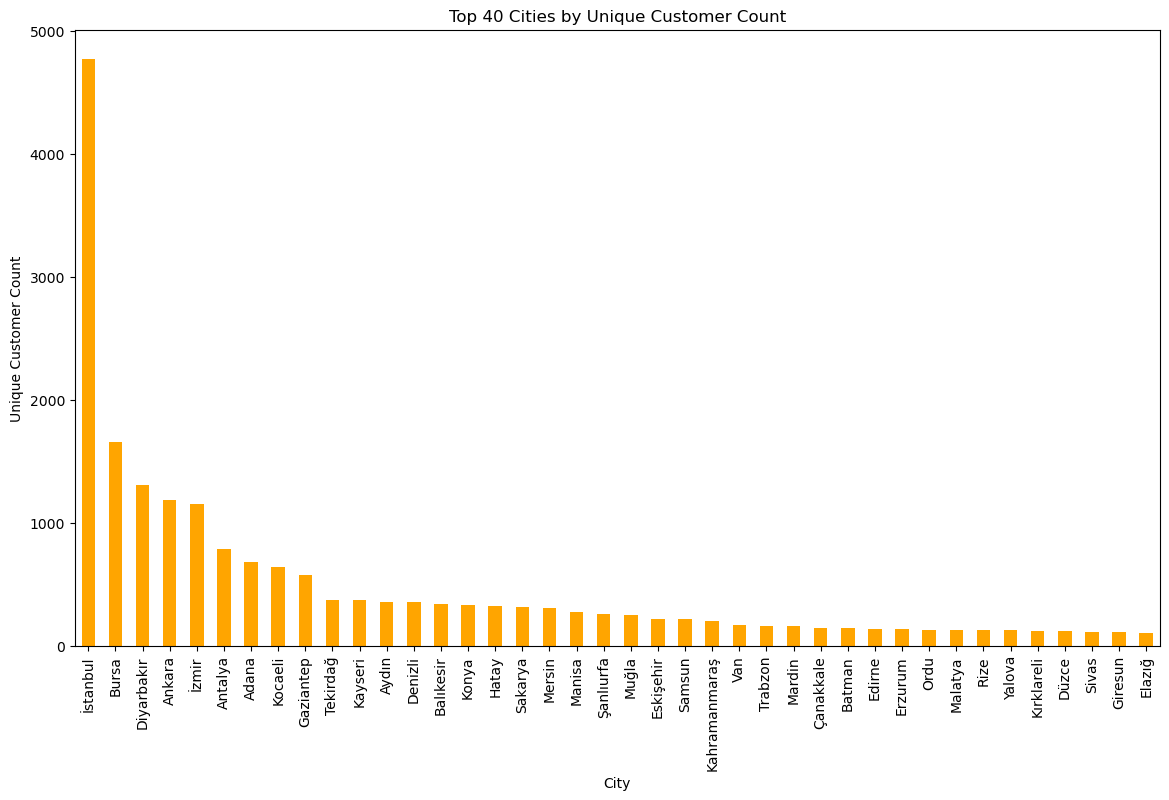

In [67]:
# Plotting the top 40 cities with unique customers
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 8))
top_40_cities.plot(kind='bar', color='orange')

plt.title('Top 40 Cities by Unique Customer Count')
plt.xlabel('City')
plt.ylabel('Unique Customer Count')
plt.xticks(rotation=90)

# Show the plot
plt.show()

### Task-8: Plot the conversion for each month of the data (Conversion % = No. of unique First Deposits in the month / No. of unique Registrations in the month) Here, the conversion percentage should be reflected in red, and the labels in the X-axis should be year & month out of the Deposit Dates.

In [69]:
df.head()

,IDCUSTOMER,GENDER,CITY,COUNTRY,FIRST_DEPOSIT_AMOUNT,REGISTRATION_DATE,DEPOSIT_DATE,Customer_Lifetime
0,5075649,M,ankara,Turkey,100.0,2009-01-10,2022-06-05,791
1,5176235,M,elazığ,Turkey,400.0,2009-03-01,2022-02-11,905
2,5249140,M,izmir,Turkey,200.0,2009-04-06,2022-05-02,825
3,5300998,M,Üsküdar,Turkey,100.0,2009-05-02,2022-02-11,905
4,5371454,M,sakarya,Turkey,880.0,2009-06-07,2022-05-29,798


In [70]:
# Convert date columns to datetime
df['REGISTRATION_DATE'] = pd.to_datetime(df['REGISTRATION_DATE'])

In [71]:
# Extracting Year-Month from DepositDate and RegistrationDate
df['DEPOSIT_YEAR_MONTH'] = df['DEPOSIT_DATE'].dt.to_period('M')
df['REGISTRATION_YEAR_MONTH'] = df['REGISTRATION_DATE'].dt.to_period('M')

In [75]:
df.head()

,IDCUSTOMER,GENDER,CITY,COUNTRY,FIRST_DEPOSIT_AMOUNT,REGISTRATION_DATE,DEPOSIT_DATE,Customer_Lifetime,DEPOSIT_YEAR_MONTH,REGISTRATION_YEAR_MONTH
0,5075649,M,ankara,Turkey,100.0,2009-01-10,2022-06-05,791,2022-06,2009-01
1,5176235,M,elazığ,Turkey,400.0,2009-03-01,2022-02-11,905,2022-02,2009-03
2,5249140,M,izmir,Turkey,200.0,2009-04-06,2022-05-02,825,2022-05,2009-04
3,5300998,M,Üsküdar,Turkey,100.0,2009-05-02,2022-02-11,905,2022-02,2009-05
4,5371454,M,sakarya,Turkey,880.0,2009-06-07,2022-05-29,798,2022-05,2009-06


In [76]:
# Calculating unique number of deposits and registrations per month
unique_deposits_per_month = df.groupby('DEPOSIT_YEAR_MONTH')['DEPOSIT_DATE'].nunique()
print(unique_deposits_per_month)

unique_registrations_per_month = df.groupby('REGISTRATION_YEAR_MONTH')['REGISTRATION_DATE'].nunique()
print(unique_registrations_per_month)

DEPOSIT_YEAR_MONTH
2022-01    31
2022-02    28
2022-03    31
2022-04    30
2022-05    31
2022-06    30
2022-07    31
2022-08    31
Freq: M, Name: DEPOSIT_DATE, dtype: int64
REGISTRATION_YEAR_MONTH
2009-01     1
2009-03     1
2009-04     1
2009-05     1
2009-06     1
           ..
2022-04    30
2022-05    31
2022-06    30
2022-07    31
2022-08    31
Freq: M, Name: REGISTRATION_DATE, Length: 152, dtype: int64


In [77]:
# Merging the two series into a DataFrame
conversion_df = pd.DataFrame({'Deposits': unique_deposits_per_month,'Registrations': unique_registrations_per_month}).fillna(0)
conversion_df

,Deposits,Registrations
2009-01,0.0,1
2009-03,0.0,1
2009-04,0.0,1
2009-05,0.0,1
2009-06,0.0,1
...,...,...
2022-04,30.0,30
2022-05,31.0,31
2022-06,30.0,30
2022-07,31.0,31


In [78]:
# Calculating the conversion percentage
conversion_df['Conversion %'] = (conversion_df['Deposits'] / conversion_df['Registrations']) * 100
conversion_df

,Deposits,Registrations,Conversion %
2009-01,0.0,1,0.0
2009-03,0.0,1,0.0
2009-04,0.0,1,0.0
2009-05,0.0,1,0.0
2009-06,0.0,1,0.0
...,...,...,...
2022-04,30.0,30,100.0
2022-05,31.0,31,100.0
2022-06,30.0,30,100.0
2022-07,31.0,31,100.0


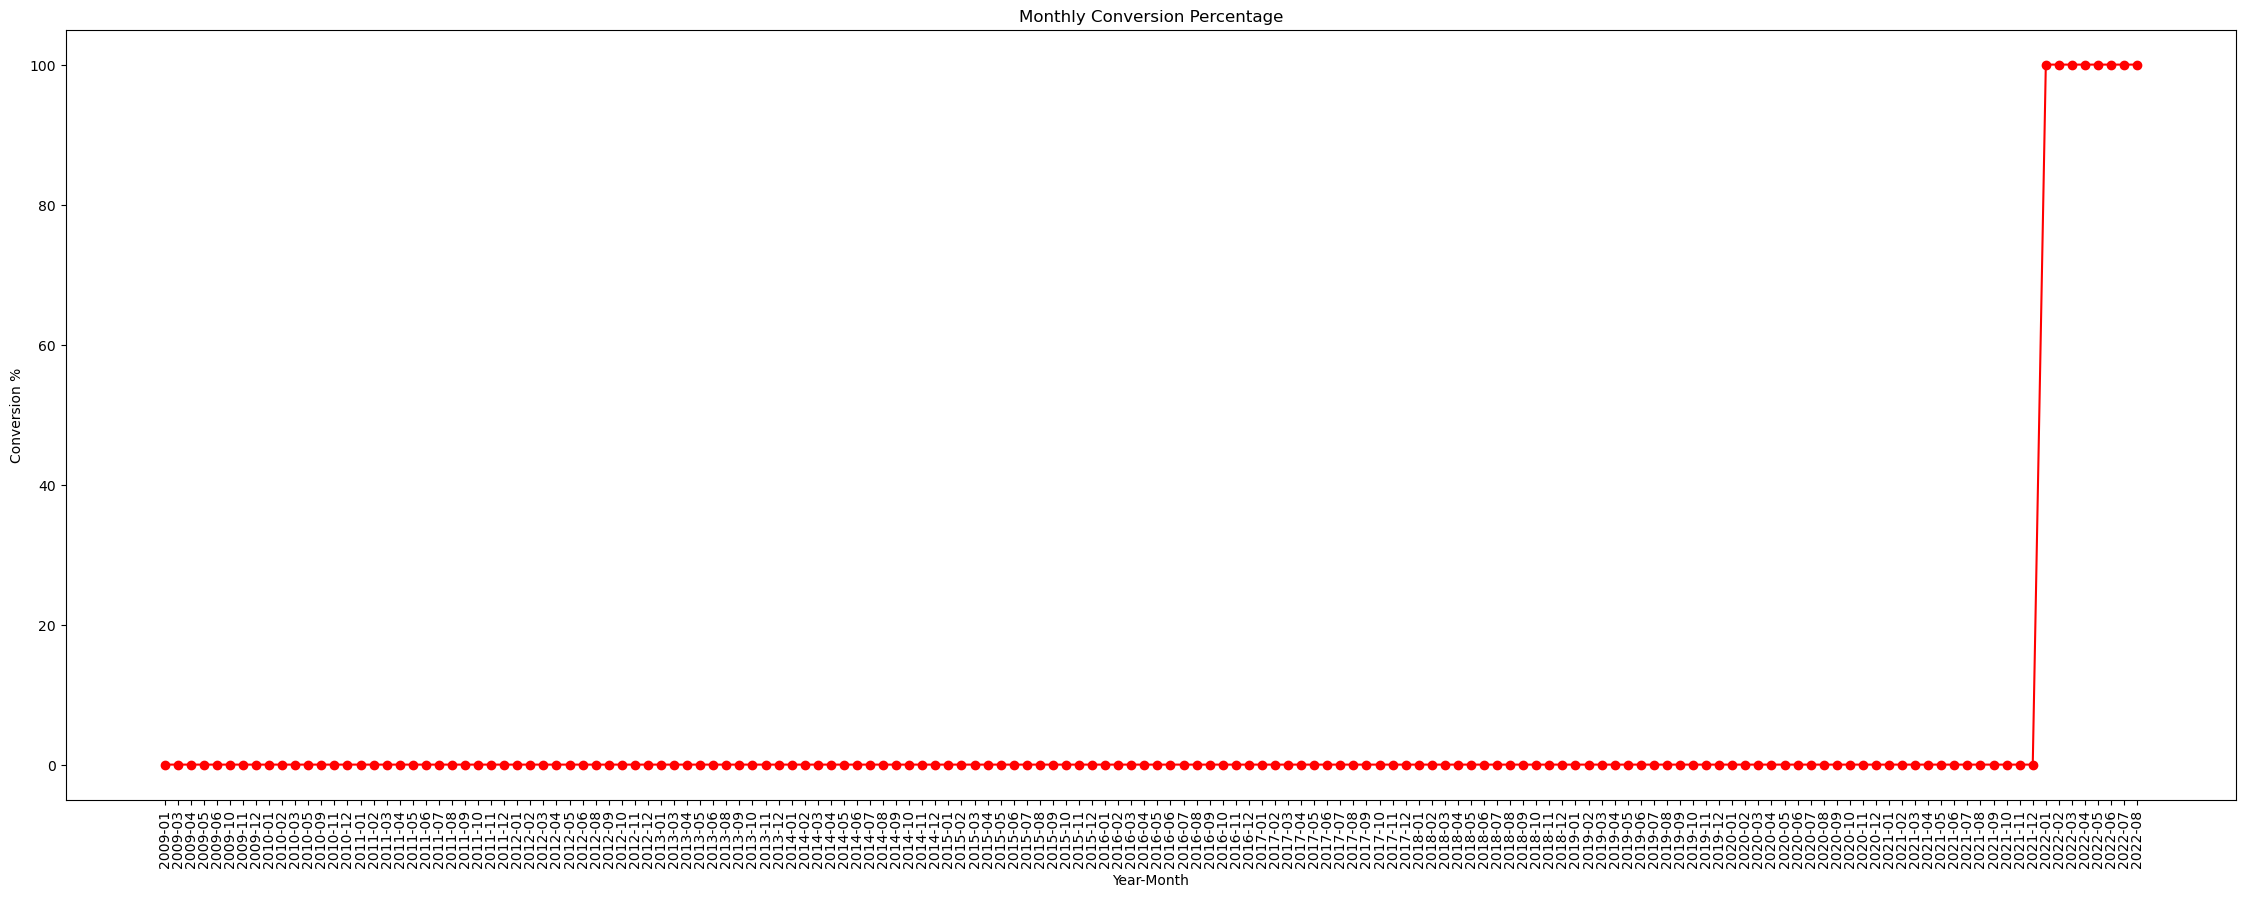

In [89]:
# Plotting the conversion for each month of the data

plt.figure(figsize=(28, 10))
plt.plot(conversion_df.index.astype(str), conversion_df['Conversion %'], marker='o', color='red')
plt.title('Monthly Conversion Percentage')
plt.xlabel('Year-Month')
plt.ylabel('Conversion %')
plt.xticks(rotation=90)

# Show the plot
plt.show()

### Task-9 : What was the conversion rate in June 2022, limit the answer to 2 decimal places. (in %)

In [90]:
# Calculating the conversion percentage for June 2022
# Extract conversion rate for June 2022
conversion_june_2022 = conversion_df.loc['2022-06'].get('Conversion %', 0)
conversion_june_2022 = round(conversion_june_2022, 2)
print(conversion_june_2022)

100.0


### Task-10 : Make a copy of the original data in the file assignment_python as a pandas dataframe called 'df_ft' and generate the following columns: 1)week of day column from the deposit date column. 2)descriptive statistics of the table. 3)make a column with the first_deposit_amounts binned in bins of 500 and reflected against every customer ID (for example, someone with a first deposit amount of 880 should reflect in the binning column as '500-1000'.

In [91]:
df_ft = pd.read_csv('assignment_python.csv')
df_ft.head()

,IDCUSTOMER,GENDER,CITY,COUNTRY,FIRST_DEPOSIT_AMOUNT,REGISTRATION_DATE,DEPOSIT_DATE
0,5075649,M,ankara,Turkey,100.0,2009-01-10,2022-06-05
1,5176235,M,elazığ,Turkey,400.0,2009-03-01,2022-02-11
2,5249140,M,izmir,Turkey,200.0,2009-04-06,2022-05-02
3,5300998,M,Üsküdar,Turkey,100.0,2009-05-02,2022-02-11
4,5371454,M,sakarya,Turkey,880.0,2009-06-07,2022-05-29


In [97]:
# 1) week of day column from the deposit date column
from datetime import datetime
df_ft['REGISTRATION_DATE'] = pd.to_datetime(df_ft['REGISTRATION_DATE'])
df_ft['DEPOSIT_DATE'] = pd.to_datetime(df_ft['DEPOSIT_DATE'])

In [102]:
df_ft['WeekOfYear'] = df_ft['DEPOSIT_DATE'].dt.isocalendar().week
df_ft.head()

,IDCUSTOMER,GENDER,CITY,COUNTRY,FIRST_DEPOSIT_AMOUNT,REGISTRATION_DATE,DEPOSIT_DATE,WeekOfYear
0,5075649,M,ankara,Turkey,100.0,2009-01-10,2022-06-05,22
1,5176235,M,elazığ,Turkey,400.0,2009-03-01,2022-02-11,6
2,5249140,M,izmir,Turkey,200.0,2009-04-06,2022-05-02,18
3,5300998,M,Üsküdar,Turkey,100.0,2009-05-02,2022-02-11,6
4,5371454,M,sakarya,Turkey,880.0,2009-06-07,2022-05-29,21


In [104]:
# 2)descriptive statistics of the table
descriptive_stats = df_ft.describe(include='all')
print(descriptive_stats)

          IDCUSTOMER GENDER      CITY COUNTRY  FIRST_DEPOSIT_AMOUNT  \
count   2.206500e+04  22065     22065   22065          22065.000000   
unique           NaN      3       331       1                   NaN   
top              NaN      M  İstanbul  Turkey                   NaN   
freq             NaN  21985      4770   22065                   NaN   
mean    1.380593e+08    NaN       NaN     NaN            284.806530   
min     5.075649e+06    NaN       NaN     NaN              0.380000   
25%     1.459097e+08    NaN       NaN     NaN             70.000000   
50%     1.465139e+08    NaN       NaN     NaN            100.000000   
75%     1.471483e+08    NaN       NaN     NaN            250.000000   
max     1.478480e+08    NaN       NaN     NaN         100000.000000   
std     3.272693e+07    NaN       NaN     NaN            943.993064   

                    REGISTRATION_DATE                   DEPOSIT_DATE  \
count                           22065                          22065   
uni

In [105]:
# 3)make a column with the first_deposit_amounts binned in bins of 500 and reflected against every customer ID

# Defining bin edges and labels
bin_edges = [0, 500, 1000, 1500, 2000]  
bin_labels = ['0-500', '500-1000', '1000-1500', '1500-2000']


In [108]:
# Create the binned column
df_ft['DepositBin'] = pd.cut(df_ft['FIRST_DEPOSIT_AMOUNT'], bins=bin_edges, labels=bin_labels, right=False)

# Display the DataFrame with the new column
df_ft.head()

,IDCUSTOMER,GENDER,CITY,COUNTRY,FIRST_DEPOSIT_AMOUNT,REGISTRATION_DATE,DEPOSIT_DATE,WeekOfYear,DepositBin
0,5075649,M,ankara,Turkey,100.0,2009-01-10,2022-06-05,22,0-500
1,5176235,M,elazığ,Turkey,400.0,2009-03-01,2022-02-11,6,0-500
2,5249140,M,izmir,Turkey,200.0,2009-04-06,2022-05-02,18,0-500
3,5300998,M,Üsküdar,Turkey,100.0,2009-05-02,2022-02-11,6,0-500
4,5371454,M,sakarya,Turkey,880.0,2009-06-07,2022-05-29,21,500-1000


### Task-11 : Find a 7 days moving average of number of registrations. (calculating an average of the T-7 days for every week's total registrations)

In [110]:
# Count registrations per day
daily_registrations = df_ft.groupby('REGISTRATION_DATE').size()
daily_registrations

REGISTRATION_DATE
2009-01-10     1
2009-03-01     1
2009-04-06     1
2009-05-02     1
2009-06-07     1
              ..
2022-08-27    67
2022-08-28    83
2022-08-29    55
2022-08-30    58
2022-08-31    58
Length: 1417, dtype: int64

In [112]:
# Create a DataFrame with daily registrations
daily_df = pd.DataFrame(daily_registrations, columns=['Registrations'])
daily_df.index.name = 'Date'

In [113]:
# Calculate 7-day moving average
daily_df['7-Day Moving Average'] = daily_df['Registrations'].rolling(window=7).mean()

daily_df

,Registrations,7-Day Moving Average
Date,,
2009-01-10,1,NaN
2009-03-01,1,NaN
2009-04-06,1,NaN
2009-05-02,1,NaN
2009-06-07,1,NaN
...,...,...
2022-08-27,67,69.714286
2022-08-28,83,72.285714
2022-08-29,55,69.857143
